In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('./Concrete_Data_Yeh.csv')

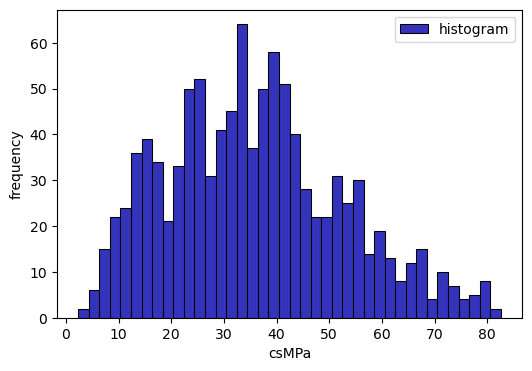

In [3]:
plt.figure(figsize=(6, 4))

sns.histplot(df.csMPa, label='histogram', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('csMPa')

plt.show()

In [4]:
df['goodconcrete']=(df.csMPa>50.0).astype(int)
del df['csMPa']

In [5]:
df.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,goodconcrete
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,0
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,0


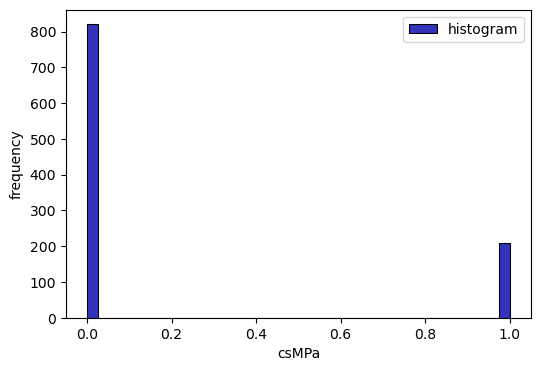

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(df.goodconcrete, label='histogram', color='#0000aa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('frequency')
plt.xlabel('csMPa')

plt.show()

# Validation

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [9]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

In [10]:
y_train = df_train.goodconcrete.values
y_val = df_val.goodconcrete.values

In [11]:
del df_train['goodconcrete']
del df_val['goodconcrete']

# Exploratory Data Analysis

In [12]:
global_mean = df_train_full.goodconcrete.mean()
round(global_mean, 3)

0.201

# Data Prep

In [13]:
numerical=['cement', 'slag', 'flyash', 'water', 'age', 'superplasticizer', 'coarseaggregate', 'fineaggregate']

In [14]:
train_dict = df_train[numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

# Training Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [17]:
val_dict = df_val[numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [18]:
model.predict(X_val)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
model.predict_proba(X_val)

array([[9.42517771e-01, 5.74822286e-02],
       [9.87828720e-01, 1.21712801e-02],
       [9.91724605e-01, 8.27539501e-03],
       [8.24016265e-01, 1.75983735e-01],
       [9.91050967e-01, 8.94903251e-03],
       [3.64628978e-01, 6.35371022e-01],
       [7.79546072e-01, 2.20453928e-01],
       [9.85742957e-01, 1.42570434e-02],
       [9.99229048e-01, 7.70951992e-04],
       [3.47768575e-01, 6.52231425e-01],
       [8.99356837e-01, 1.00643163e-01],
       [9.89271908e-01, 1.07280921e-02],
       [9.90064700e-01, 9.93530022e-03],
       [6.55576183e-01, 3.44423817e-01],
       [2.58987135e-01, 7.41012865e-01],
       [9.19704122e-01, 8.02958777e-02],
       [1.76319718e-01, 8.23680282e-01],
       [1.67959268e-01, 8.32040732e-01],
       [9.94699706e-01, 5.30029361e-03],
       [9.15495024e-01, 8.45049763e-02],
       [4.08475551e-01, 5.91524449e-01],
       [9.96436830e-01, 3.56317003e-03],
       [8.87835551e-01, 1.12164449e-01],
       [9.85468841e-01, 1.45311591e-02],
       [5.471961

In [20]:
y_pred = model.predict_proba(X_val)[:, 1]

In [22]:
good = y_pred > 0.5

In [23]:
(y_val == good).mean()

0.8308823529411765

In [30]:
accuracy_score(y_val, y_pred>0.5)

0.8308823529411765

# Confusion Matrix

In [32]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [33]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [34]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[190,  18],
       [ 28,  36]])

In [35]:
len(y_val)

272

In [36]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.7 , 0.07],
       [0.1 , 0.13]])

# Precision and Recall

In [ ]:
p = tp / (tp + fp)
p

In [ ]:
r = tp / (tp + fn)
r